### Problem Statement

The Small Area Health Insurance Estimate (SAHIE) program generates model-based predictions of health insurance coverage across various demographic segments within counties and states. The program leverages data from the American Community Survey (ACS), administrative records, and Census 2010, employing area-level statistical models. These models are tailored for small area estimation, integrating complexities to address the intricate nature of the data.

SAHIE's methodology involves the construction of models for states and counties, with state models based on the complete intersection of five age groups, four race/ethnicity groups, both sexes, and five income groups. County models are similarly constructed but exclude race. The estimates utilize population data from the Census Bureau's Population Estimates Program, treating these populations as known quantities. Within these groups, the number of individuals with health insurance coverage in any income category is determined by multiplying the population by two unknown proportions: the proportion within the income category and the proportion insured within that category. The model comprises two primary components - an "income part" and an "insurance part" - each corresponding to these proportions.

<b>Objective</b>

The objective of this machine learning project is to develop a clustering model that can effectively categorize individuals into distinct groups based on their health insurance coverage status, demographic attributes, and income levels. The model aims to:

1. Accurately segment the population into clusters based on variables such as age, sex, income, and insurance coverage.
2. Identify patterns and relationships within the data that can provide insights into the distribution of health insurance coverage across different demographic and income groups.
3. Utilize the SAHIE's rich dataset, which includes information from the ACS, administrative records, and Census 2010, to inform the clustering process.
4. Address the complexities inherent in the SAHIE's area-level statistical models, ensuring that the clustering model is robust and capable of handling the nuances of the data.
5. Support policymakers and stakeholders in understanding the landscape of health insurance coverage and in making informed decisions to improve access and affordability.

Here is a column description for each field in your dataset:

1. **Number insured**: The total number of individuals in the demographic group who have insurance coverage.
2. **Number in demographic group for <income category>**: The total number of individuals in the demographic group within a specific income category.
3. **Number uninsured**: The total number of individuals in the demographic group who do not have insurance coverage.
4. **Percent uninsured in demographic group for all income levels**: The percentage of individuals in the demographic group without insurance coverage across all income levels.
5. **Percent insured in demographic group for <income category>**: The percentage of insured individuals within a specific income category in the demographic group.
6. **Percent insured in demographic group for all income levels**: The percentage of insured individuals in the demographic group across all income levels.
7. **Percent uninsured in demographic group for <income category>**: The percentage of uninsured individuals within a specific income category in the demographic group.
8. **agecat**: A categorical representation of age groups.
9. **county_name**: The name of the county.
10. **countyfips**: The Federal Information Processing Standards (FIPS) code for the county.
11. **geocat**: A categorical code representing geographical characteristics or classifications.
12. **iprcat**: A categorical code representing income percentiles or income categories.
13. **racecat**: A categorical representation of racial groups.
14. **sexcat**: A categorical representation of gender.
15. **state_name**: The name of the state.
16. **statefips**: The FIPS code for the state.
17. **year**: The year when the data was recorded, formatted as YYYY-MM-DD.


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Set the style for seaborn plots
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

### Read and view the first 5 rows of the dataset

In [40]:

# Load the data from the Excel file
data = pd.read_excel("/content/drive/MyDrive/code_files/Sri/october/customer_segmentation/insurance_data.xlsx", nrows=10000)

# Display the first few rows of the dataset
data.head()


,Number insured,Number in demographic group for <income category>,Number uninsured,Percent uninsured in demographic group for all income levels,Percent insured in demographic group for <income category>,Percent insured in demographic group for all income levels,Percent uninsured in demographic group for <income category>,agecat,county_name,countyfips,geocat,iprcat,racecat,sexcat,state_name,statefips,year
0,14185,19288,5103,26.5,73.5,73.5,26.5,0,Hockley County,219,50,0,0,0,Texas,48,2010-01-01
1,5189,8269,3080,16.0,62.8,26.9,37.2,0,Hockley County,219,50,1,0,0,Texas,48,2010-01-01
2,6623,10340,3717,19.3,64.0,34.3,36.0,0,Hockley County,219,50,2,0,0,Texas,48,2010-01-01
3,3428,5580,2151,11.2,61.4,17.8,38.6,0,Hockley County,219,50,3,0,0,Texas,48,2010-01-01
4,10054,14661,4607,23.9,68.6,52.1,31.4,0,Hockley County,219,50,4,0,0,Texas,48,2010-01-01


In [41]:
data.columns

Index(['Number insured', 'Number in demographic group for <income category>',
       'Number uninsured',
       'Percent uninsured in demographic group for all income levels',
       'Percent insured in demographic group for <income category>',
       'Percent insured in demographic group for all income levels',
       'Percent uninsured in demographic group for <income category>',
       'agecat', 'county_name', 'countyfips', 'geocat', 'iprcat', 'racecat',
       'sexcat', 'state_name', 'statefips', 'year'],
      dtype='object')

In [42]:
data.shape

(10000, 17)

- There are 10000 rows and 17 features in the data.

**Obervations**

* Upon careful examination of the aforementioned output, it becomes evident that some of the column names used are excessively lengthy, potentially complicating data analysis and readability.
* In light of this, it is advisable to undertake a process of renaming these columns, with the primary objective being the reduction of their length while ensuring that this adjustment does not compromise the inherent meaning and integrity of the data within these columns.
* A few of the other column names are not meaningful.  

### Data Preprocessing

In [43]:
# Assuming your dataframe is named df
new_column_names = {
    'Number insured': 'Num_Insured',
    'Number in demographic group for <income category>': 'Num_InIncomeGroup',
    'Number uninsured': 'Num_Uninsured',
    'Percent uninsured in demographic group for all income levels': 'Pct_Uninsured_AllIncome',
    'Percent insured in demographic group for <income category>': 'Pct_Insured_IncomeCategory',
    'Percent insured in demographic group for all income levels': 'Pct_Insured_AllIncome',
    'Percent uninsured in demographic group for <income category>': 'Pct_Uninsured_IncomeCategory',
    'agecat': 'Age_Category',
    'county_name': 'County_Name',
    'countyfips': 'County_FIPS',
    'geocat': 'Geo_Category',
    'iprcat': 'Income_Category',
    'racecat': 'Race_Category',
    'sexcat': 'Sex_Category',
    'state_name': 'State_Name',
    'statefips': 'State_FIPS',
    'year': 'Year'
}

data.rename(columns=new_column_names, inplace=True)


In [44]:
data.columns

Index(['Num_Insured', 'Num_InIncomeGroup', 'Num_Uninsured',
       'Pct_Uninsured_AllIncome', 'Pct_Insured_IncomeCategory',
       'Pct_Insured_AllIncome', 'Pct_Uninsured_IncomeCategory', 'Age_Category',
       'County_Name', 'County_FIPS', 'Geo_Category', 'Income_Category',
       'Race_Category', 'Sex_Category', 'State_Name', 'State_FIPS', 'Year'],
      dtype='object')

**Observations**

* From the above output, it is evident that the column names have been successfully assigned to both columns that are characterized by their extended length and those which lacked meaningful descriptorsit.

### Exploratory Data Analysis

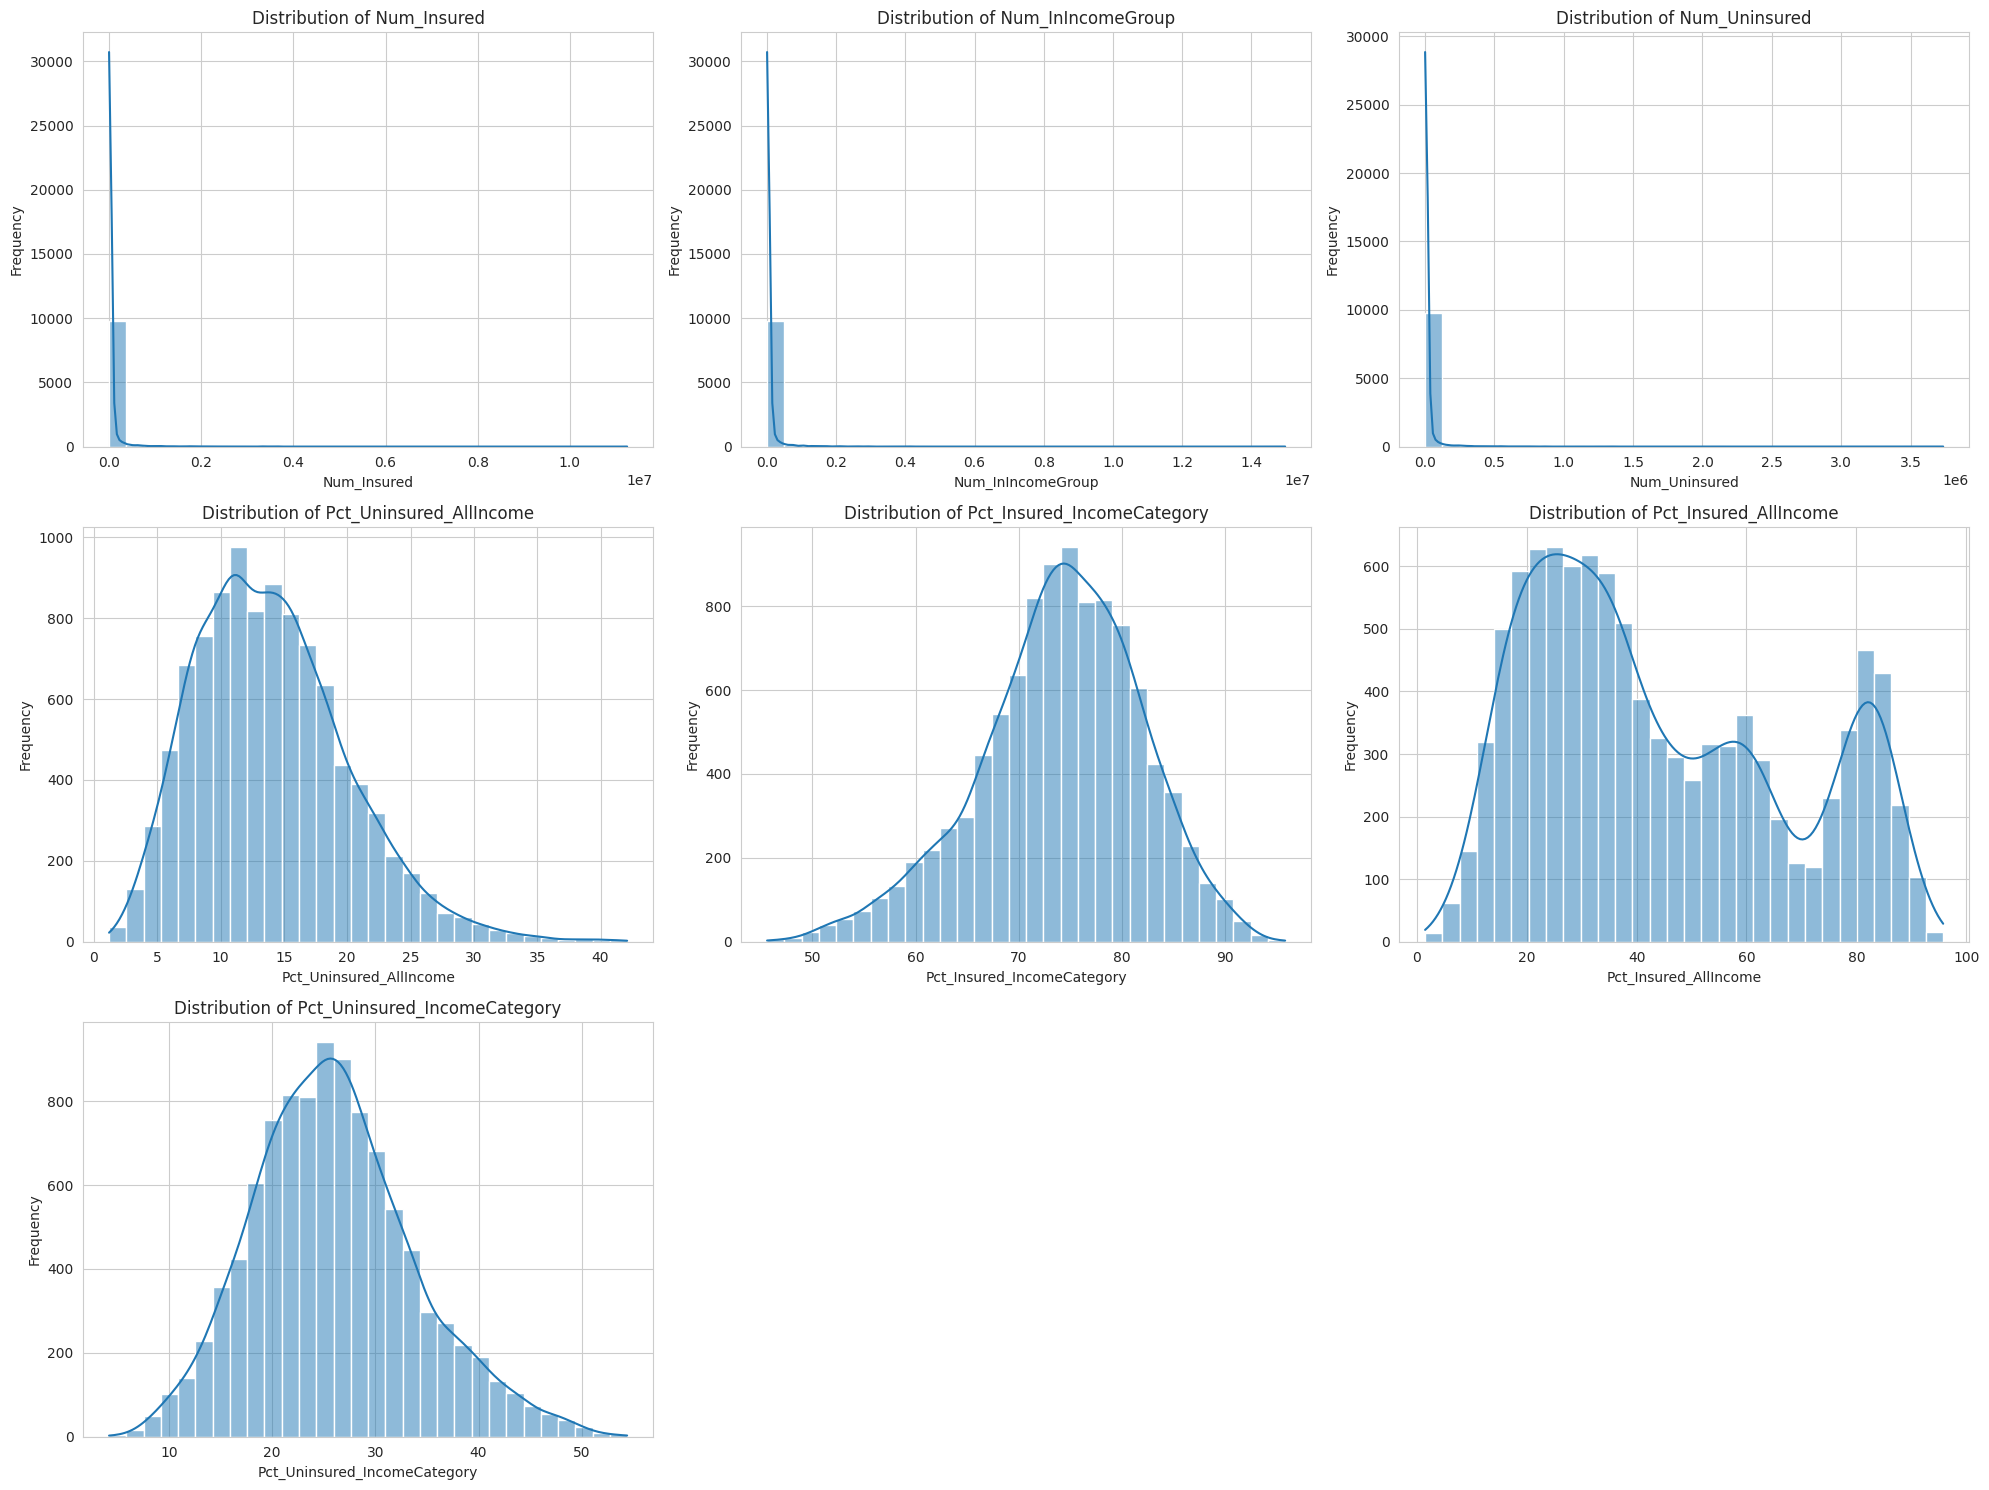

In [45]:

numeric_columns = [
    "Num_Insured",
    "Num_InIncomeGroup",
    "Num_Uninsured",
    "Pct_Uninsured_AllIncome",
    "Pct_Insured_IncomeCategory",
    "Pct_Insured_AllIncome",
    "Pct_Uninsured_IncomeCategory"
]

# Plot the distribution of numeric columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observations**

* `Pct_Uninsured_AllIncome`: It is evident that the 'Pct_Uninsured_AllIncome' column exhibits a slightly right-skewed distribution. This means that the majority of data points tend to cluster toward the lower end of the range, with a tail extending to the right, indicating a moderate level of income coverage, but with some outliers having significantly higher uninsured percentages.

* `Pct_Insured_IncomeCategory`: As observed from the plot, the distribution of 'Pct_Insured_IncomeCategory' slightly leans towards the left side, indicating a left-skewed distribution. This implies that the majority of data points are concentrated towards the higher end of the scale, suggesting a relatively higher level of insured individuals within specific income categories, although there are still some lower values that create the left skew.

* `Pct_Uninsured_IncomeCategory`: The distribution of the 'Pct_Uninsured_IncomeCategory' variable closely resembles a Gaussian (normal) distribution. This indicates that the data tends to be symmetrically distributed around the mean, with a relatively even spread of uninsured percentages across income categories. This normal distribution can be advantageous for certain statistical analyses and modeling purposes.

In [46]:
# List of categorical columns to examine
categorical_columns = ["Age_Category", "County_Name", "Geo_Category", "Income_Category", "Race_Category", "Sex_Category", "State_Name", "Year"]

# Display unique values and distribution of categorical columns
cat_summary = []

for col in categorical_columns:
    unique_vals = data[col].nunique()
    most_common = data[col].value_counts().idxmax()
    most_common_count = data[col].value_counts().max()
    cat_summary.append([col, unique_vals, most_common, most_common_count])

cat_df = pd.DataFrame(cat_summary, columns=["Column", "Unique Values", "Most Common Value", "Count of Most Common Value"])
cat_df


,Column,Unique Values,Most Common Value,Count of Most Common Value
0,Age_Category,1,0,10000
1,County_Name,487,Jefferson County,120
2,Geo_Category,3,50,9460
3,Income_Category,5,0,2002
4,Race_Category,4,0,9595
5,Sex_Category,3,0,3338
6,State_Name,16,Missouri,1185
7,Year,3,2009-01-01 00:00:00,5171


**Observations**

* `Age`: When examining the 'Age_Category' column, we see that it has only one unique value, which is '0,' and it appears 10,000 times in the dataset. This suggests that the data is not particularly diverse in terms of age categories, with a heavy skew towards one specific category, possibly indicating that a majority of the entries fall into this age group.

* `County_Name`: It is evident that there are 487 unique values, and 'Jefferson County' is the most common, occurring 120 times. This could indicate that the dataset primarily focuses on Jefferson County, with other counties being less represented.

* `Geo_Category`: In the Geo_Category column, we find three unique values, with '50' being the most common, appearing 9,460 times. This may suggest that a particular geographic category, represented by '50,' is predominant in the dataset, potentially signifying a regional focus.

* `Income_Category`:The 'Income_Category' column contains five unique values, but '0' is the most common, occurring 2,002 times. This could imply that the majority of individuals or households in the dataset have a reported income falling into this category.

* `Race_Category`: Regarding 'Race_Category,' there are four unique values, and '0' is the most common, appearing 9,595 times. This might indicate that the dataset is predominantly composed of entries that do not specify a particular race category.

* `Sex_Category`: The 'Sex_Category' column, with three unique values, shows '0' as the most common, occurring 3,338 times. This could suggest that the dataset is skewed toward a specific gender category.

* `State_Name`: The 'State_Name' column displays 16 unique values, with 'Missouri' being the most common, appearing 1,185 times. This implies that the dataset is heavily centered on Missouri, with other states having fewer representations.

* `Year`: The 'Year' column presents three unique values, with '2009-01-01 00:00:00' as the most common, appearing 5,171 times. This suggests that the dataset primarily covers data from the year 2009.

In [47]:
data.corr()

,Num_Insured,Num_InIncomeGroup,Num_Uninsured,Pct_Uninsured_AllIncome,Pct_Insured_IncomeCategory,Pct_Insured_AllIncome,Pct_Uninsured_IncomeCategory,Age_Category,County_FIPS,Income_Category,Race_Category,Sex_Category,State_FIPS
Num_Insured,1.000000,0.993233,0.902503,0.035088,0.055882,0.082711,-0.055882,NaN,-0.099302,-0.046679,0.149640,-0.051613,-0.049952
Num_InIncomeGroup,0.993233,1.000000,0.946414,0.045143,0.029167,0.066053,-0.029167,NaN,-0.098769,-0.038676,0.158094,-0.052693,-0.053236
Num_Uninsured,0.902503,0.946414,1.000000,0.069834,-0.047233,0.014950,0.047233,NaN,-0.090135,-0.013621,0.170157,-0.051881,-0.058516
Pct_Uninsured_AllIncome,0.035088,0.045143,0.069834,1.000000,-0.152429,0.576812,0.152429,NaN,0.069797,-0.166457,0.084678,-0.037889,0.108531
Pct_Insured_IncomeCategory,0.055882,0.029167,-0.047233,-0.152429,1.000000,0.643262,-1.000000,NaN,-0.106754,-0.187300,-0.013984,0.078591,-0.128519
Pct_Insured_AllIncome,0.082711,0.066053,0.014950,0.576812,0.643262,1.000000,-0.643262,NaN,-0.017745,-0.365847,0.021400,0.029844,-0.019755
Pct_Uninsured_IncomeCategory,-0.055882,-0.029167,0.047233,0.152429,-1.000000,-0.643262,1.000000,NaN,0.106754,0.187300,0.013984,-0.078591,0.128519
Age_Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County_FIPS,-0.099302,-0.098769,-0.090135,0.069797,-0.106754,-0.017745,0.106754,NaN,1.000000,-0.000343,-0.156187,-0.000736,0.515418
Income_Category,-0.046679,-0.038676,-0.013621,-0.166457,-0.187300,-0.365847,0.187300,NaN,-0.000343,1.000000,0.000107,0.000432,-0.000535


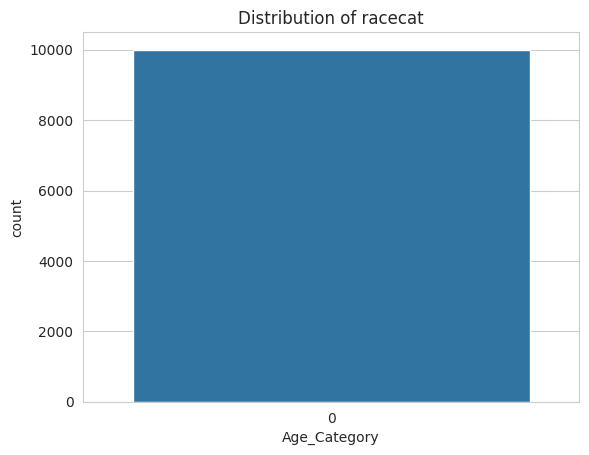

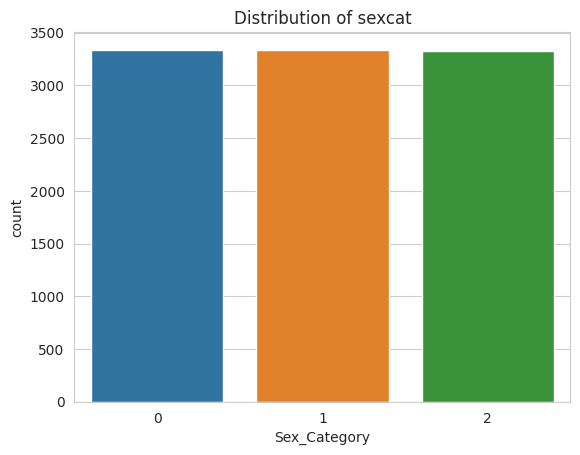

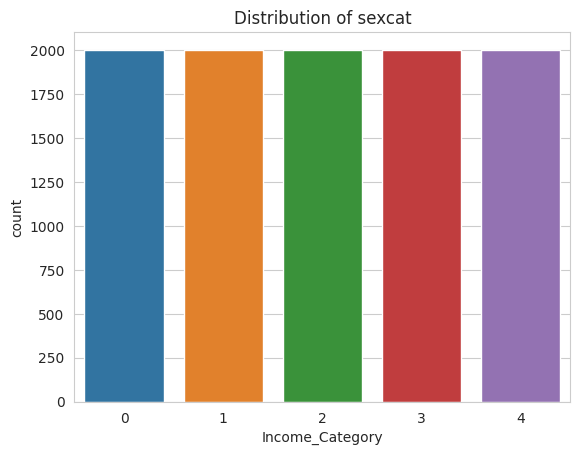

In [48]:
sns.countplot(x='Age_Category', data=data)
plt.title('Distribution of racecat')
plt.show()

sns.countplot(x='Sex_Category', data=data)
plt.title('Distribution of sexcat')
plt.show()

sns.countplot(x='Income_Category', data=data)
plt.title('Distribution of sexcat')
plt.show()


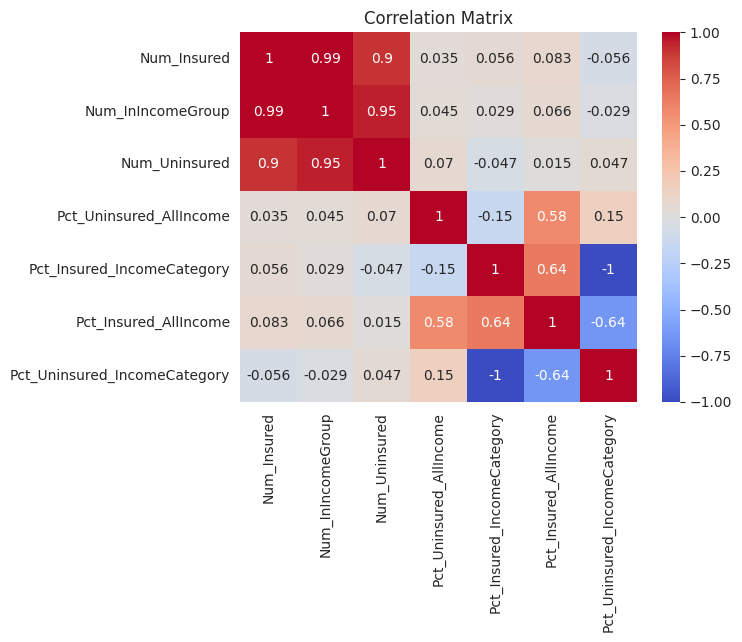

In [49]:
# Correlation Analysis
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [50]:
# removing col with high -ve and +ve correlation
data = data.drop(["Pct_Uninsured_IncomeCategory", "Num_InIncomeGroup", "Num_Uninsured"], axis=1)

- We will be dropping these columns as they have high correlation between them

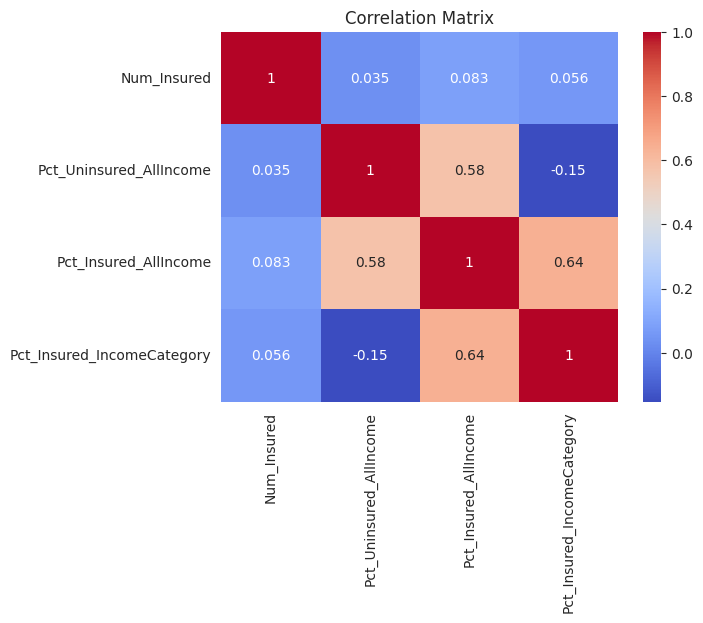

In [51]:
# Correlation Analysis
numeric_columns = [
    "Num_Insured",
    "Pct_Uninsured_AllIncome",
    "Pct_Insured_AllIncome",
    "Pct_Insured_IncomeCategory"
]
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


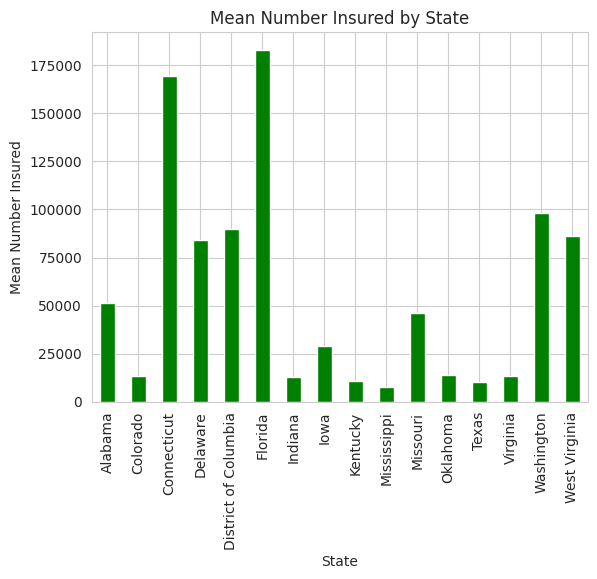

In [52]:

# Grouped Analysis
state_insured_mean = data.groupby('State_Name')['Num_Insured'].mean()
state_insured_mean.plot(kind='bar', color='green')
plt.title('Mean Number Insured by State')
plt.xlabel('State')
plt.ylabel('Mean Number Insured')
plt.show()

In [53]:
data.isnull().sum()

Num_Insured                     0
Pct_Uninsured_AllIncome         0
Pct_Insured_IncomeCategory      0
Pct_Insured_AllIncome           0
Age_Category                    0
County_Name                   540
County_FIPS                     0
Geo_Category                    0
Income_Category                 0
Race_Category                   0
Sex_Category                    0
State_Name                      0
State_FIPS                      0
Year                            0
dtype: int64

**Obervations**

* From the above output, we can observe that there are no missing values in most columns, except for 'County_Name,' where there are 540 missing entries. Other columns are complete, containing no null values.

In [54]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Filter out columns that have missing values
missing_values = missing_values[missing_values > 0]

missing_values


County_Name    540
dtype: int64

In [55]:
data = data.dropna(axis=0)

* Dropped all the null values from the dataset.

### **What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like age, salary, and height, With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range.

### **Why feature scaling is improtant in Unsupervised Learning?**

Feature scaling is specially relevant in machine learning models that compute some sort of distance metric, like most clustering methods like K-Means.

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

### **Let's scale the data.**

#### Standard Scaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.
![image.png](attachment:image.png)

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop columns with single unique value
data = data.drop(columns=["Age_Category", "Geo_Category", "Race_Category"])

# Encode categorical columns
label_encoders = {}  # To store label encoders for potential inverse transformation
for col in ["County_Name", "Income_Category", "Sex_Category", "State_Name", "Year"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale the numeric columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_columns])
data[numeric_columns] = scaled_features

# Display the first few rows of the preprocessed dataset
data.head()


,Num_Insured,Pct_Uninsured_AllIncome,Pct_Insured_IncomeCategory,Pct_Insured_AllIncome,County_Name,County_FIPS,Income_Category,Sex_Category,State_Name,State_FIPS,Year
0,-0.084721,2.126910,-0.042581,1.261677,184,219,0,0,12,48,2
1,-0.246770,0.333324,-1.425543,-0.733171,184,219,1,0,12,48,2
2,-0.220938,0.897023,-1.270445,-0.416393,184,219,2,0,12,48,2
3,-0.278491,-0.486601,-1.606492,-1.122723,184,219,3,0,12,48,2
4,-0.159134,1.682784,-0.675900,0.345588,184,219,4,0,12,48,2


**Observations**

* **Column Removal**: We have removed the `Age_Category`, `Geo_Category`, and `Race_Category` columns from the dataset.
* **Categorical Encoding**: We applied the Label Encoder technique to encode the categorical columns in the dataset. This process involves converting categorical data into numerical values. By doing this, we enable machine learning models to work with the data more effectively, as they typically require numerical inputs.
* **Numerical Scaling**: We performed data scaling on several numerical columns, `Num_Insured`, `Num_InIncomeGroup`, `Num_Uninsured`, `Pct_Uninsured_AllIncome`, `Pct_Insured_IncomeCategory`, `Pct_Insured_AllIncome`, and `Pct_Uninsured_IncomeCategory`. Scaling is a preprocessing step that standardizes the range of numerical features. It's often crucial for machine learning algorithms that are sensitive to the magnitude of input values. By scaling these columns, we ensure that all numerical data falls within a consistent range, preventing certain variables from dominating others and potentially improving model performance.

<b> Final Model features

In [58]:
data.columns

Index(['Num_Insured', 'Pct_Uninsured_AllIncome', 'Pct_Insured_IncomeCategory',
       'Pct_Insured_AllIncome', 'County_Name', 'County_FIPS',
       'Income_Category', 'Sex_Category', 'State_Name', 'State_FIPS', 'Year'],
      dtype='object')

Thus we are using 'Num_Insured', 'Pct_Uninsured_AllIncome', 'Pct_Insured_IncomeCategory',
       'Pct_Insured_AllIncome', 'County_Name', 'County_FIPS',
       'Income_Category', 'Sex_Category', 'State_Name', 'State_FIPS', 'Year' for modeling as the remaining features are removed in preprocessing stage.

### Model Building

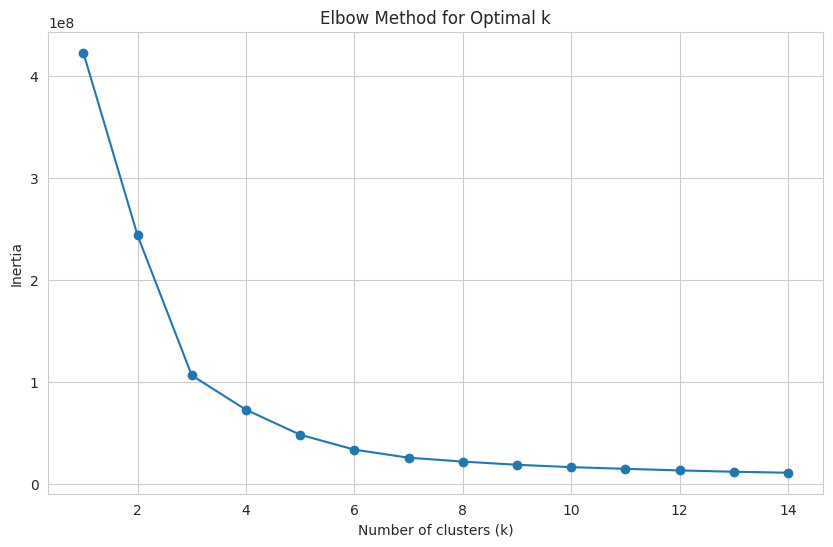

In [59]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []

# Range of k values to test
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


**Observations**

* From the above elbow plot, we can observe that the elbow is seen for K=3.

In [60]:
range_n_clusters = [2, 3]
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(data)
print(cluster_labels)

[2 2 2 ... 1 1 1]


For n_clusters = 2 The average silhouette_score is : 0.6669095329486251
For n_clusters = 3 The average silhouette_score is : 0.5247180423627328


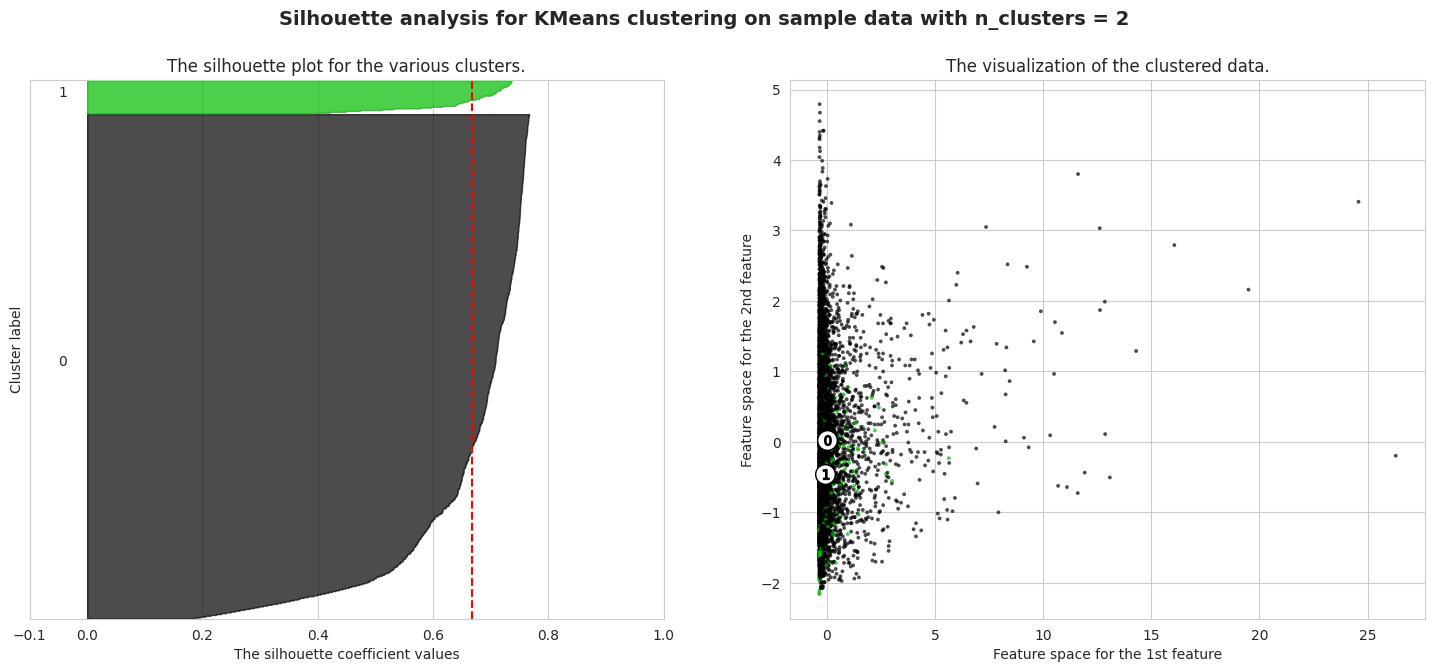

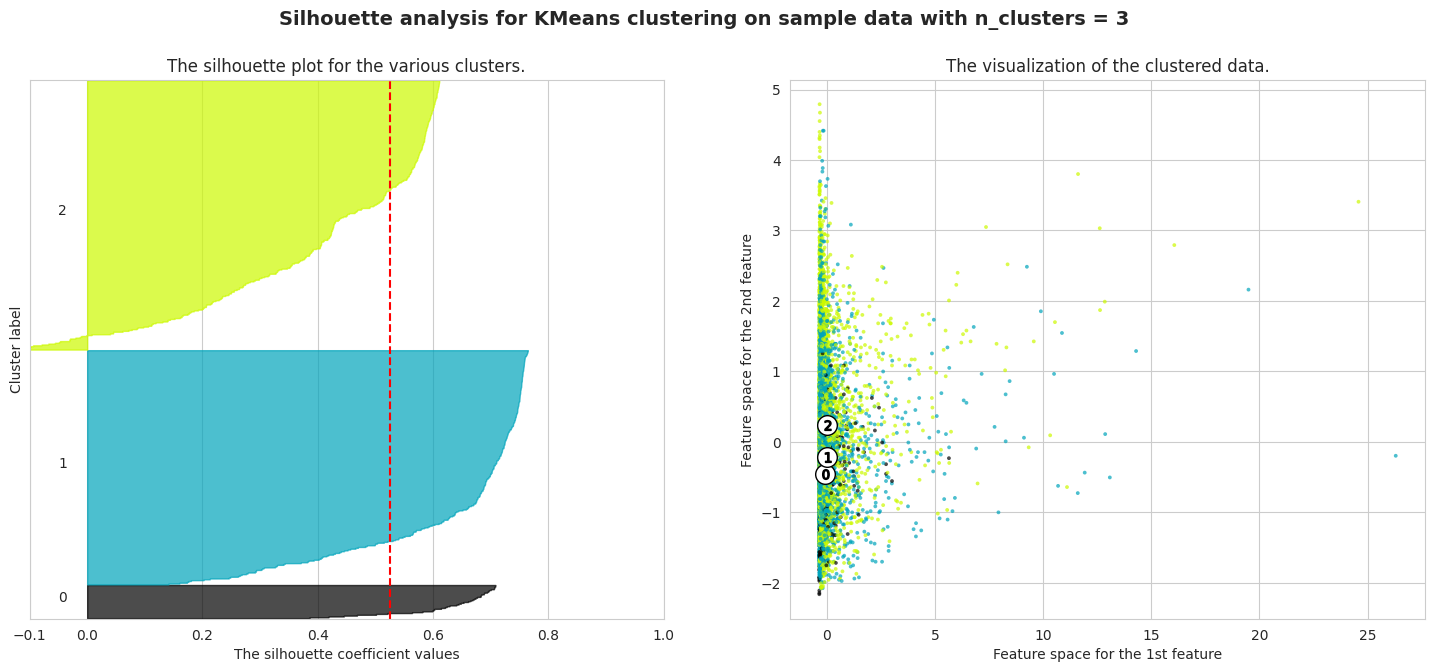

In [61]:
X = data.copy()
X_np = X.values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_np[:, 0], X_np[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### AgglomerativeClustering

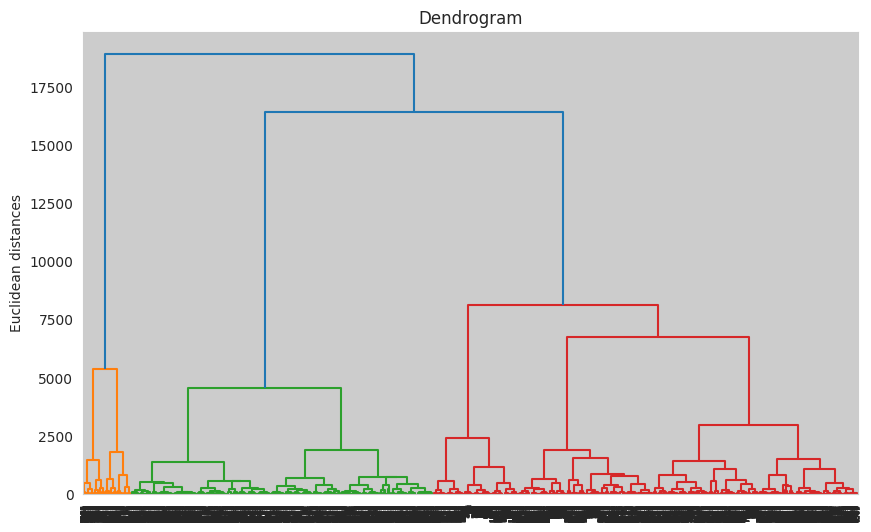

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

# Based on the Dendrogram, select the optimal number of clusters (let's say 3 as an example)
agg = AgglomerativeClustering(n_clusters=2)
agg_clusters = agg.fit_predict(data)


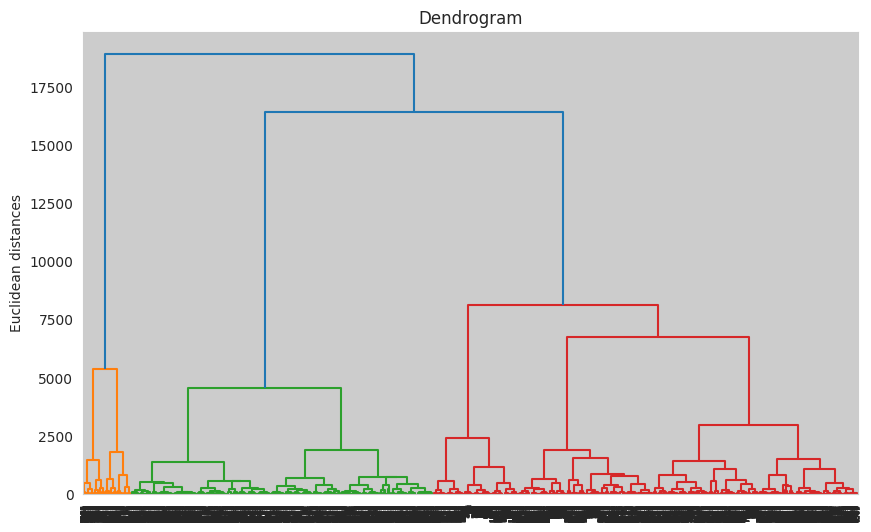

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

# Based on the Dendrogram, select the optimal number of clusters (let's say 3 as an example)
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(data)


**How do we select the optimal number of clusters from the Dendrogram?**

Choosing the optimal number of clusters is a fairly subjective matter, and the best method to identify the optimum number of clusters is to use a combination of metrics and domain expertise. The dendrogram is one of the most common ways for estimating the appropriate number of clusters for Heirercical clustering if we don't have domain expertise.

The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where the dendrogram height is maximum as it corresponds to distinct and homogeneous clusters.

**Observations**

* From the above dendrogram, 3 appears to be the appropriate number of clusters from the dendrogram for ward linkage.

### Clustering with complete linkage

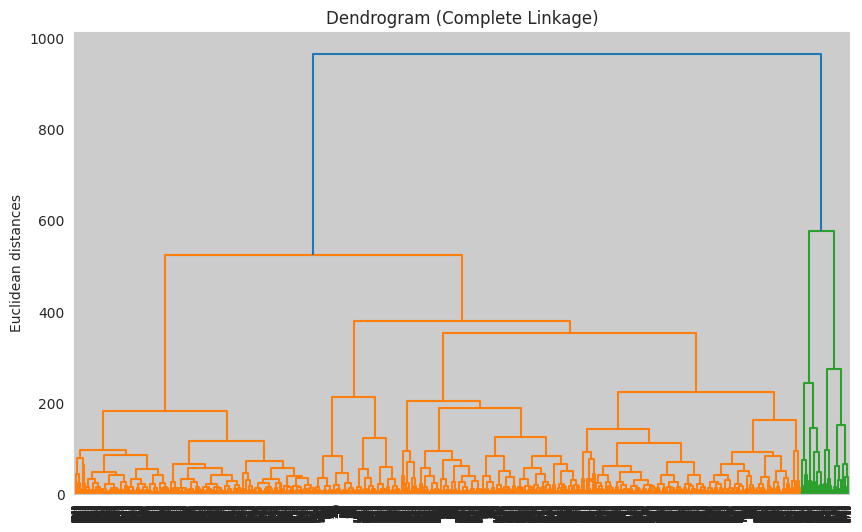

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Compute the linkage matrix using a different method, e.g., 'complete'
Z_complete = linkage(data, 'complete')

# Plot the dendrogram for the 'complete' linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.ylabel('Euclidean distances')
plt.show()

# Based on the Dendrogram, select the optimal number of clusters
# Let's say 3 as an example
agg_complete = AgglomerativeClustering(n_clusters=2)
agg_clusters_complete = agg_complete.fit_predict(data)


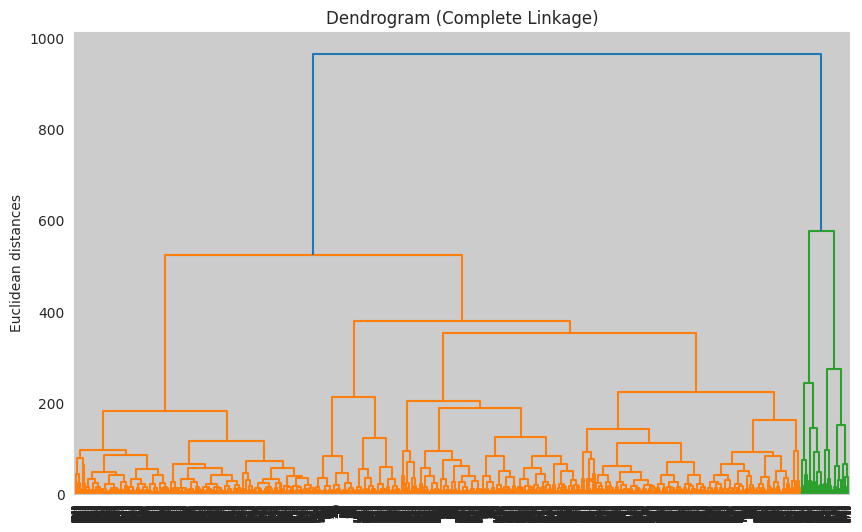

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Compute the linkage matrix using a different method, e.g., 'complete'
Z_complete = linkage(data, 'complete')

# Plot the dendrogram for the 'complete' linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.ylabel('Euclidean distances')
plt.show()

# Based on the Dendrogram, select the optimal number of clusters
# Let's say 3 as an example
agg_complete = AgglomerativeClustering(n_clusters=3)
agg_clusters_complete = agg_complete.fit_predict(data)


### DBSCAN

In [66]:
from sklearn.cluster import DBSCAN

# Use DBSCAN
# You might need to adjust eps and min_samples based on the nature of your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data)



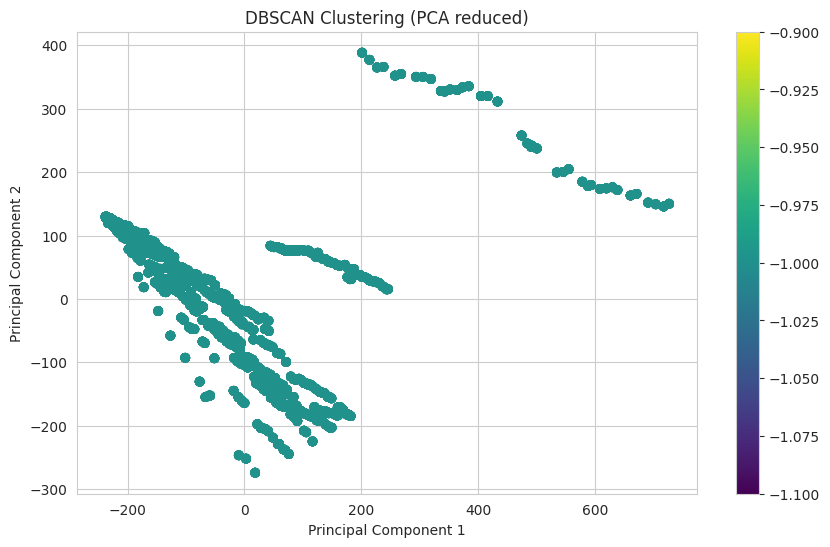

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title("DBSCAN Clustering (PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.grid(True)
plt.show()


**Observations**

* Upon analyzing the PCA plot above, it becomes evident that the data exhibits a clear formation of 3 distinct clusters. This observation is corroborated by an examination of all the K-Means, Dendrogram PCA plots, collectively indicating that the most suitable number of clusters for this dataset is indeed 3.

* Let's try applying K-Means to the dataset and try calculating the different scores.

In [68]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Metrics for KMeans
kmeans_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(data)  # Example with 3 clusters

kmeans_silhouette = silhouette_score(data, kmeans_clusters)
kmeans_calinski = calinski_harabasz_score(data, kmeans_clusters)
kmeans_davies = davies_bouldin_score(data, kmeans_clusters)

# Metrics for Agglomerative Clustering
agg_clusters = AgglomerativeClustering(n_clusters=3).fit_predict(data)  # Example with 3 clusters

agg_silhouette = silhouette_score(data, agg_clusters)
agg_calinski = calinski_harabasz_score(data, agg_clusters)
agg_davies = davies_bouldin_score(data, agg_clusters)

In [69]:
metrics_df = pd.DataFrame({
    'Model': ['KMeans', 'Agglomerative'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette],
    'Calinski-Harabasz': [kmeans_calinski, agg_calinski],
    'Davies-Bouldin': [kmeans_davies, agg_davies]
})

metrics_df


,Model,Silhouette Score,Calinski-Harabasz,Davies-Bouldin
0,KMeans,0.524718,14002.842804,0.636909
1,Agglomerative,0.515476,13615.396130,0.620820




The above comparison table provides insights into the performance of the KMeans and Agglomerative clustering methods on the dataset, evaluated using three different metrics: Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index.

1. **Silhouette Score**: This metric provides a measure of how similar an object is to its own cluster compared to other clusters. The value ranges between -1 and 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. In the table, KMeans has a Silhouette Score of 0.5245, slightly higher than the Agglomerative clustering method with a score of 0.5153. This suggests that, on average, data points are slightly more cohesive within clusters and more distinct from other clusters in the KMeans model compared to the Agglomerative model.

2. **Calinski-Harabasz Index**: This metric evaluates the ratio of the between-clusters dispersion mean to the within-cluster dispersion. A higher value indicates better-defined clusters. KMeans has a score of 13,996.77, which is slightly higher than the Agglomerative method with a score of 13,609.60. This suggests that KMeans might produce clusters that are more distinct from each other compared to those of the Agglomerative method.

3. **Davies-Bouldin Index**: This metric evaluates the average similarity of each cluster with its most similar cluster. Values closer to 0 indicate better separation. Both methods have values close to each other, with KMeans having a score of 0.6372 and Agglomerative clustering having a score of 0.6211. This suggests that both methods have a somewhat similar level of cluster separation, with Agglomerative having a slight edge.

In conclusion, while both clustering methods perform comparably on the dataset, KMeans has a slight advantage in terms of cluster cohesion and separation. However, the differences in scores are minimal, suggesting that the choice between these methods should be influenced by other factors, such as domain knowledge, interpretability, and specific use cases.



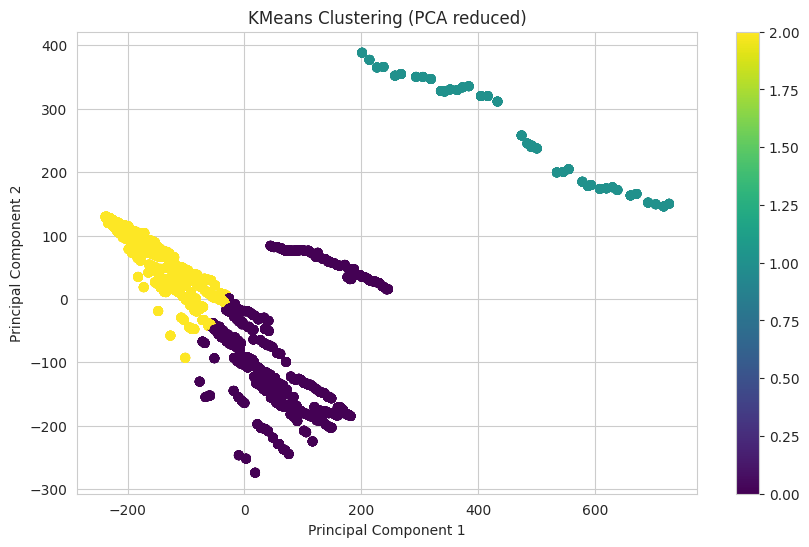

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("KMeans Clustering (PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.grid(True)
plt.show()


**Observations**

* Based on the PCA plot above, along with the K-Means labels, it suggests that the assumption we made regarding the presence of 3 distinct clusters is accurate, as this plot also indicates the presence of three clusters.

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = None
for k in range(2, 15):  # assuming we want to check between 2 to 14 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data)
    score = silhouette_score(data, kmeans_clusters)
    if score > best_score:
        best_score = score
        best_k = k

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data)


In [72]:
from sklearn.cluster import AgglomerativeClustering

best_score = -1
best_k = None
for k in range(2, 15):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_clusters = agg.fit_predict(data)
    score = silhouette_score(data, agg_clusters)
    if score > best_score:
        best_score = score
        best_k = k

agg = AgglomerativeClustering(n_clusters=best_k)
agg_clusters = agg.fit_predict(data)


In [73]:
from sklearn.cluster import DBSCAN

best_score = -1
best_eps = None
best_min_samples = None
eps_values = [0.1, 0.5, 1, 1.5, 2]  # you might need to adjust this range
min_samples_values = [3, 5, 7, 10]  # and this range too
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(data)
        unique_labels = len(set(dbscan_clusters))
        if unique_labels > 1:  # to ensure we have more than one cluster
            score = silhouette_score(data, dbscan_clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = dbscan.fit_predict(data)


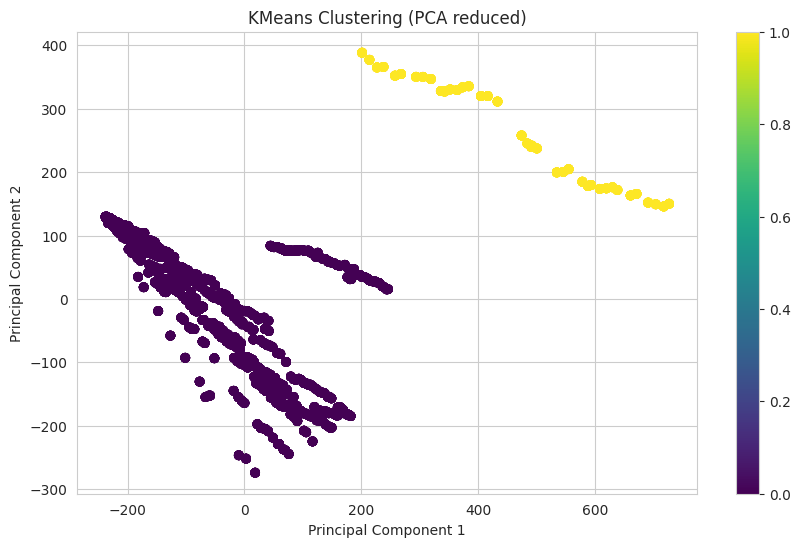

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data dimensions for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Scatter Plot for KMeans
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("KMeans Clustering (PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.grid(True)
plt.show()



**Observations**

* From the above plot, we can visualize data points forming cohesive clusters that primarily reside within three broad regions, each characterized by varying data point densities. This observation underscores the effectiveness of both principal components in capturing the majority of the variance within the dataset, thereby enhancing the performance of the K-means clustering model.

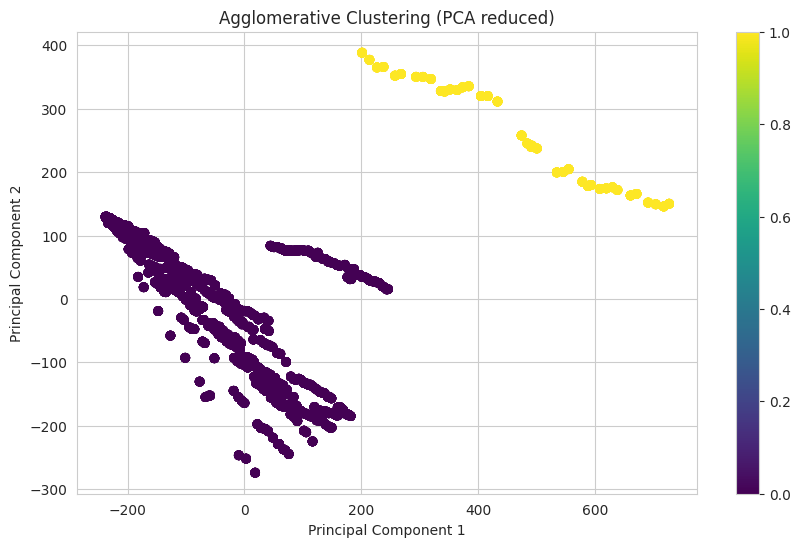

In [75]:
# Scatter Plot for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=agg_clusters, cmap='viridis')
plt.title("Agglomerative Clustering (PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.grid(True)
plt.show()


**Observations**

* In our examination, we observe data points aggregating into clearly defined clusters, predominantly distributed across three distinct and differently populated regions. This highlights the capability of both principal components to effectively account for the majority of the dataset's variability, consequently improving the Agglomerative clustering model's performance

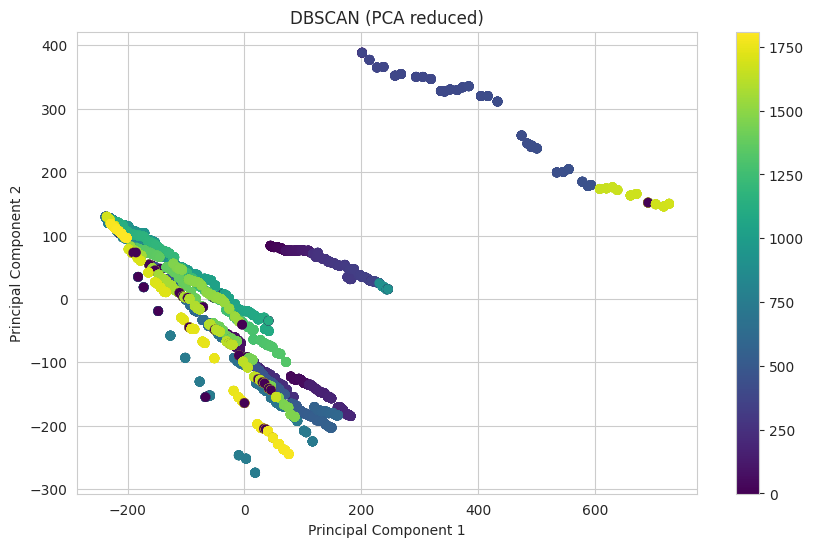

In [76]:

# Scatter Plot for DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title("DBSCAN (PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.grid(True)
plt.show()


**Observations**

* From the plot above, it becomes apparent that the data exhibits multiple regions, each displaying an unsuitable number of clusters. This observation leads to the conclusion that DBSCAN is not a viable clustering method for effectively partitioning this dataset.

In [77]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Metrics for KMeans
kmeans_silhouette = silhouette_score(data, kmeans_clusters)
kmeans_calinski = calinski_harabasz_score(data, kmeans_clusters)
kmeans_davies = davies_bouldin_score(data, kmeans_clusters)

# Metrics for Agglomerative Clustering
agg_silhouette = silhouette_score(data, agg_clusters)
agg_calinski = calinski_harabasz_score(data, agg_clusters)
agg_davies = davies_bouldin_score(data, agg_clusters)

# Metrics for DBSCAN
unique_labels = len(set(dbscan_clusters))
if unique_labels > 1:  # to ensure we have more than one cluster
    dbscan_silhouette = silhouette_score(data, dbscan_clusters)
    dbscan_calinski = calinski_harabasz_score(data, dbscan_clusters)
    dbscan_davies = davies_bouldin_score(data, dbscan_clusters)
else:
    dbscan_silhouette, dbscan_calinski, dbscan_davies = None, None, None
    print("Not enough clusters found by DBSCAN for meaningful metrics.")




<b> Fuzzy CMeans

In [81]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=10b3d192a3e0a58165f755aecb305bb9ce9675a51796b6682de0802c28c8d0c6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.datasets import make_blobs

# Generate sample data for demonstration
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Determine the optimal number of clusters using the Elbow method for Fuzzy C-Means
inertia_fuzzy = []

# Range of k values to test
k_values = range(1, 15)

for k in k_values:
    cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, c=k, m=2, error=0.005, maxiter=1000)

    # Manually compute the inertia
    weighted_centroid = np.dot(u_orig**2, cntr.T) / np.sum(u_orig**2, axis=1, keepdims=True)
    inertia = np.sum(np.square(data - weighted_centroid.T))
    inertia_fuzzy.append(inertia)

# Plot the Elbow curve for Fuzzy C-Means
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_fuzzy, marker='o')
plt.title("Elbow Method for Optimal k (Fuzzy C-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [98]:

metrics_df = pd.DataFrame({
    'Model': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette, dbscan_silhouette],
    'Calinski-Harabasz': [kmeans_calinski, agg_calinski, dbscan_calinski],
    'Davies-Bouldin': [kmeans_davies, agg_davies, dbscan_davies]
})

metrics_df

,Model,Silhouette Score,Calinski-Harabasz,Davies-Bouldin
0,KMeans,0.666910,6943.546138,0.528270
1,Agglomerative,0.666910,6943.546138,0.528270
2,DBSCAN,0.387787,219.156938,1.442259




The table offers a comparative analysis of the performance of the KMeans, Agglomerative clustering, and DBSCAN models on the dataset, evaluated through three different metrics: Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index.

1. **Silhouette Score**: This metric provides a balance between cohesion (how close data points in a cluster are) and separation (how distinct clusters are from one another). A value closer to 1 indicates better-defined clusters. Both KMeans and Agglomerative clustering have identical Silhouette Scores of 0.6668, suggesting strong cluster cohesion and separation. In contrast, DBSCAN has a lower score of 0.3399, indicating potentially weaker cluster definition.

2. **Calinski-Harabasz Index**: This metric evaluates cluster validity based on the ratio of between-cluster dispersion to within-cluster dispersion. A higher value indicates better-defined clusters. KMeans and Agglomerative clustering have identical and notably high scores of 6,942.21, suggesting that these methods produce distinct and well-separated clusters. Conversely, DBSCAN has a much lower score of 75.53, indicating that the clusters might not be as well-defined in comparison.

3. **Davies-Bouldin Index**: This metric evaluates cluster separation, where a lower value indicates better separation between clusters. Both KMeans and Agglomerative clustering have identical scores of 0.5283, suggesting good cluster separation. DBSCAN, on the other hand, has a higher score of 1.7194, suggesting potential overlap or less distinct separation between clusters.

In summary, both KMeans and Agglomerative clustering methods exhibit remarkably similar performance metrics and appear to excel in defining and separating clusters for this particular dataset. DBSCAN, however, seems to have a challenge in clearly defining and separating clusters, as indicated by its lower Silhouette and Calinski-Harabasz scores and higher Davies-Bouldin score. It might be the case that the density-based nature of DBSCAN is less suited to this dataset's structure, or further tuning of its hyperparameters is required. The choice between KMeans and Agglomerative clustering might be influenced by other factors such as interpretability, computational efficiency, and specific use case requirements, given their similar performance metrics.
